In [10]:
# import libraries
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ground Truth : 5')

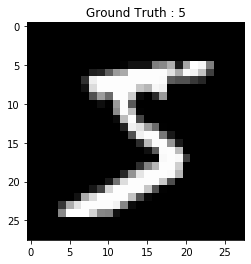

In [11]:
# Loading data and plotting the digit
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [4]:
# Processing the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data //=255
test_data //=255
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [5]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
          validation_data=(test_data, test_labels_one_hot))


Epoch 1/20
235/235 [==============================] - 5s 23ms/step - loss: 1.7802 - accuracy: 0.3767 - val_loss: 1.6573 - val_accuracy: 0.4105
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 1.6078 - accuracy: 0.4211 - val_loss: 1.6403 - val_accuracy: 0.4126
Epoch 3/20
235/235 [==============================] - 5s 22ms/step - loss: 1.5694 - accuracy: 0.4328 - val_loss: 1.6275 - val_accuracy: 0.4087
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 1.5421 - accuracy: 0.4412 - val_loss: 1.6169 - val_accuracy: 0.4181
Epoch 5/20
235/235 [==============================] - 5s 21ms/step - loss: 1.5213 - accuracy: 0.4457 - val_loss: 1.6099 - val_accuracy: 0.4237
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 1.5038 - accuracy: 0.4542 - val_loss: 1.6169 - val_accuracy: 0.4217
Epoch 7/20
235/235 [==============================] - 5s 21ms/step - loss: 1.4880 - accuracy: 0.4566 - val_loss: 1.6216 - val_accuracy: 0.4227

In [6]:
# Evaluation
predict1 = model.predict_classes(test_data[[0], :])
print(predict1)
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("*********************************")
print(history.history.keys())

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7]
313/313 [==============================] - 1s 2ms/step - loss: 1.7942 - accuracy: 0.4251
Evaluation result on Test Data : Loss = 1.7942447662353516, accuracy = 0.4250999987125397
*********************************
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


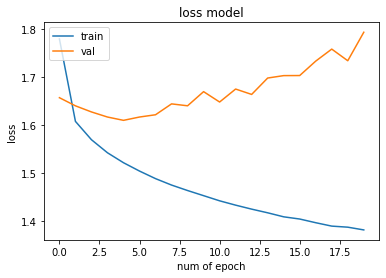

In [14]:
# question 1
# using history object for plotting loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('num of epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

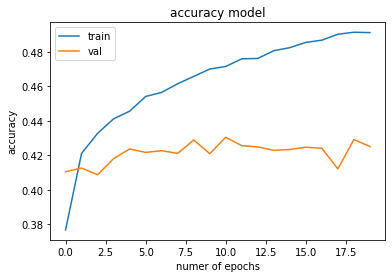

In [15]:
# using history object for plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy model')
plt.ylabel('accuracy')
plt.xlabel('numer of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

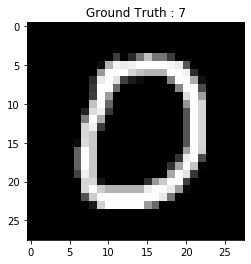

prediction in the test data:  [7]
313/313 [==============================] - 1s 2ms/step - loss: 1.7942 - accuracy: 0.4251
Testing data Evaluation : Loss = 1.7942447662353516, accuracy = 0.4250999987125397


In [13]:
# question 2
# plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data

plt.imshow(test_images[10, :, :], cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()
prediction = model.predict_classes(test_data[[10], :])
print("prediction in the test data: ", prediction)
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Testing data Evaluation : Loss = {}, accuracy = {}".format(test_loss, test_acc))